<a href="https://colab.research.google.com/github/mhuckvale/pals0039/blob/master/Tutorial_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a id='pd'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

[PALS0039 Introduction to Deep Learning for Speech and Language Processing](https://www.phon.ucl.ac.uk/courses/pals0039/)

# Tutorial Introduction to Pandas
A brief introduction to the essentials of programming with the pandas module.

This tutorial adapted from [https://github.com/QuantEcon/quantecon-notebooks-python](https://github.com/QuantEcon/quantecon-notebooks-python)




## Overview

[Pandas](http://pandas.pydata.org/) is a package of fast, efficient data analysis tools for Python.

Its popularity has surged in recent years, coincident with the rise
of fields such as data science and machine learning.

Here’s a popularity comparison over time against STATA and SAS, courtesy of Stack Overflow Trends

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/py/_static/lecture_specific/pandas/pandas_vs_rest.png" style="">

  
Just as [NumPy](http://www.numpy.org/) provides the basic array data type plus core array operations, pandas

1. defines fundamental structures for working with data and  
1. endows them with methods that facilitate operations such as  
  
  - reading in data  
  - adjusting indices  
  - working with dates and time series  
  - sorting, grouping, re-ordering and general data munging <sup><a href=#mung id=mung-link>[1]</a></sup>  
  - dealing with missing values, etc., etc.  
  


More sophisticated statistical functionality is left to other packages, such
as [statsmodels](http://www.statsmodels.org/) and [scikit-learn](http://scikit-learn.org/), which are built on top of pandas.

This lecture will provide a basic introduction to pandas.

Throughout the lecture, we will assume that the following imports have taken
place

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

## Series


<a id='index-2'></a>
Two important data types defined by pandas are  `Series` and `DataFrame`.

You can think of a `Series` as a “column” of data, such as a collection of observations on a single variable.

A `DataFrame` is an object for storing related columns of data.

Let’s start with Series

In [3]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0   -0.663553
1   -0.118155
2    0.699148
3    0.810445
Name: daily returns, dtype: float64

Here you can imagine the indices `0, 1, 2, 3` as indexing four listed
companies, and the values being daily returns on their shares.

Pandas `Series` are built on top of NumPy arrays and support many similar
operations

In [4]:
s * 100

0   -66.355335
1   -11.815547
2    69.914809
3    81.044531
Name: daily returns, dtype: float64

In [5]:
np.abs(s)

0    0.663553
1    0.118155
2    0.699148
3    0.810445
Name: daily returns, dtype: float64

But `Series` provide more than NumPy arrays.

Not only do they have some additional (statistically oriented) methods

In [6]:
s.describe()

count    4.000000
mean     0.181971
std      0.699390
min     -0.663553
25%     -0.254505
50%      0.290496
75%      0.726972
max      0.810445
Name: daily returns, dtype: float64

But their indices are more flexible

In [7]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN   -0.663553
AAPL   -0.118155
MSFT    0.699148
GOOG    0.810445
Name: daily returns, dtype: float64

Viewed in this way, `Series` are like fast, efficient Python dictionaries
(with the restriction that the items in the dictionary all have the same
type—in this case, floats).

In fact, you can use much of the same syntax as Python dictionaries

In [8]:
s['AMZN']

-0.6635533453133162

In [9]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL   -0.118155
MSFT    0.699148
GOOG    0.810445
Name: daily returns, dtype: float64

In [10]:
'AAPL' in s

True

## DataFrames


<a id='index-3'></a>
While a `Series` is a single column of data, a `DataFrame` is several columns, one for each variable.

In essence, a `DataFrame` in pandas is analogous to a (highly optimized) Excel spreadsheet.

Thus, it is a powerful tool for representing and analyzing data that are naturally organized  into rows and columns, often with  descriptive indexes for individual rows and individual columns.

Let’s look at an example that reads data from the CSV file `pandas/data/test_pwt.csv` that can be downloaded
<a href=_static/lecture_specific/pandas/data/test_pwt.csv download>here</a>.

Here’s the content of `test_pwt.csv`

```text
"country","country isocode","year","POP","XRAT","tcgdp","cc","cg"
"Argentina","ARG","2000","37335.653","0.9995","295072.21869","75.716805379","5.5788042896"
"Australia","AUS","2000","19053.186","1.72483","541804.6521","67.759025993","6.7200975332"
"India","IND","2000","1006300.297","44.9416","1728144.3748","64.575551328","14.072205773"
"Israel","ISR","2000","6114.57","4.07733","129253.89423","64.436450847","10.266688415"
"Malawi","MWI","2000","11801.505","59.543808333","5026.2217836","74.707624181","11.658954494"
"South Africa","ZAF","2000","45064.098","6.93983","227242.36949","72.718710427","5.7265463933"
"United States","USA","2000","282171.957","1","9898700","72.347054303","6.0324539789"
"Uruguay","URY","2000","3219.793","12.099591667","25255.961693","78.978740282","5.108067988"
```


Supposing you have this data saved as test_pwt.csv in the present working directory (type %pwd in Jupyter to see what this is), it can be read in as follows:

In [11]:
df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [12]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


We can select particular rows using standard Python array slicing notation

In [13]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


To select columns, we can pass a list containing the names of the desired columns represented as strings

In [14]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


To select both rows and columns using integers, the `iloc` attribute should be used with the format `.iloc[rows, columns]`

In [15]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


To select rows and columns using a mixture of integers and labels, the `loc` attribute can be used in a similar way

In [16]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


Let’s imagine that we’re only interested in population and total GDP (`tcgdp`).

One way to strip the data frame `df` down to only these variables is to overwrite the dataframe using the selection method described above

In [17]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


Here the index `0, 1,..., 7` is redundant because we can use the country names as an index.

To do this, we set the index to be the `country` variable in the dataframe

In [18]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


Let’s give the columns slightly better names

In [19]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


Population is in thousands, let’s revert to single units

In [20]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


Next, we’re going to add a column showing real GDP per capita, multiplying by 1,000,000 as we go because total GDP is in millions

In [21]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


One of the nice things about pandas `DataFrame` and `Series` objects is that they have methods for plotting and visualization that work through Matplotlib.

For example, we can easily generate a bar plot of GDP per capita

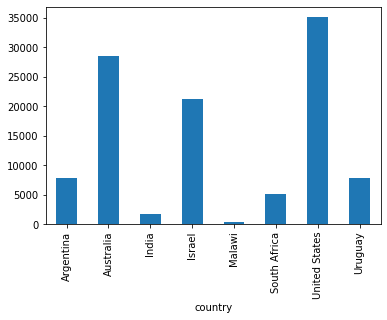

In [22]:
df['GDP percap'].plot(kind='bar')
plt.show()

At the moment the data frame is ordered alphabetically on the countries—let’s change it to GDP per capita

In [23]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


Plotting as before now yields

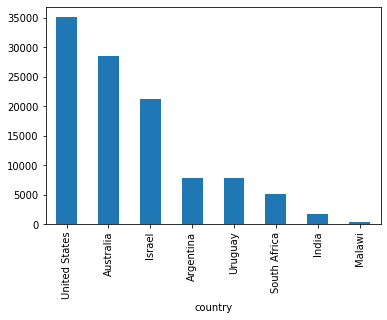

In [24]:
df['GDP percap'].plot(kind='bar')
plt.show()

## On-Line Data Sources


<a id='index-4'></a>
Python makes it straightforward to query online databases programmatically.

An important database for economists is [FRED](https://research.stlouisfed.org/fred2/) — a vast collection of time series data maintained by the St. Louis Fed.

For example, suppose that we are interested in the [unemployment rate](https://research.stlouisfed.org/fred2/series/UNRATE).

Via FRED, the entire series for the US civilian unemployment rate can be downloaded directly by entering
this URL into your browser (note that this requires an internet connection)

```text
https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv
```


(Equivalently, click here: [https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv](https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv))

This request returns a CSV file, which will be handled by your default application for this class of files.

Alternatively, we can access the CSV file from within a Python program.

This can be done with a variety of methods.

We start with a relatively low-level method and then return to pandas.

### Accessing Data with requests


<a id='index-6'></a>
One option is to use [requests](http://docs.python-requests.org/en/master/), a standard Python library for requesting data over the Internet.

To begin, try the following code on your computer

In [0]:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

If there’s no error message, then the call has succeeded.

If you do get an error, then there are two likely causes

1. You are not connected to the Internet — hopefully, this isn’t the case.  
1. Your machine is accessing the Internet through a proxy server, and Python isn’t aware of this.  


In the second case, you can either

- switch to another machine  
- solve your proxy problem by reading [the documentation](http://docs.python-requests.org/en/master/)  


Assuming that all is working, you can now proceed to use the `source` object returned by the call `requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')`

In [26]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [27]:
source[1]

'1948-01-01,3.4\r'

In [28]:
source[2]

'1948-02-01,3.8\r'

We could now write some additional code to parse this text and store it as an array.

But this is unnecessary — pandas’ `read_csv` function can handle the task for us.

We use `parse_dates=True` so that pandas recognizes our dates column, allowing for simple date filtering

In [0]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

The data has been read into a pandas DataFrame called `data` that we can now manipulate in the usual way

In [30]:
type(data)

pandas.core.frame.DataFrame

In [31]:
data.head()  # A useful method to get a quick look at a data frame

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [32]:
pd.set_option('precision', 1)
data.describe()  # Your output might differ slightly

,VALUE
count,862.0
mean,5.7
std,1.6
min,2.5
25%,4.5
50%,5.6
75%,6.8
max,10.8


We can also plot the unemployment rate from 2006 to 2012 as follows

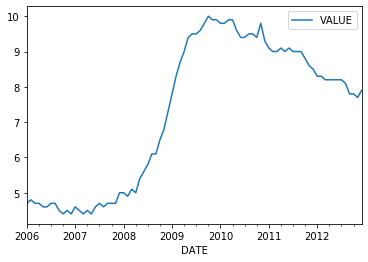

In [33]:
data['2006':'2012'].plot()
plt.show()

### Accessing World Bank Data


<a id='index-7'></a>
Let’s look at one more example of downloading and manipulating data — this
time from the World Bank.

The World Bank [collects and organizes data](http://data.worldbank.org/indicator) on a huge range of indicators.

For example, [here’s](http://data.worldbank.org/indicator/GC.DOD.TOTL.GD.ZS/countries) some data on government debt as a ratio to GDP.

If you click on “DOWNLOAD DATA” you will be given the option to download the
data as an Excel file.

The next program does this for you, reads an Excel file into a pandas
DataFrame, and plots time series for the US and Australia

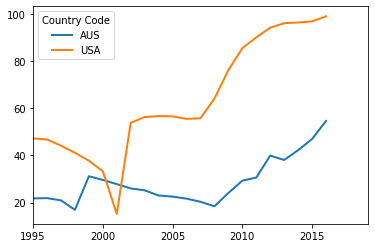

In [34]:
# == Get data and read into file gd.xls == #
wb_data_query = "http://api.worldbank.org/v2/en/indicator/gc.dod.totl.gd.zs?downloadformat=excel"
r = requests.get(wb_data_query)
with open('gd.xls', 'wb') as output:
    output.write(r.content)

# == Parse data into a DataFrame == #
govt_debt = pd.read_excel('gd.xls', sheet_name='Data', skiprows=3, index_col=1)

# == Take desired values and plot == #
govt_debt = govt_debt.transpose()
govt_debt = govt_debt[['AUS', 'USA']]
govt_debt = govt_debt[38:]
govt_debt.plot(lw=2)
plt.show()

(The file is `pandas/wb_download.py`, and can be downloaded
<a href=_static/lecture_specific/pandas/wb_download.py download>here</a>).

## Exercises


<a id='pd-ex1'></a>

### Exercise 1

Write a program to calculate the percentage price change over 2013 for the following shares

In [0]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

A dataset of daily closing prices for the above firms can be found in `pandas/data/ticker_data.csv` and can be downloaded
<a href=_static/lecture_specific/pandas/data/ticker_data.csv download>here</a>.

Plot the result as a bar graph like follows

<img src="https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/py/_static/lecture_specific/pandas/pandas_share_prices.png" style="">

## Solutions

### Exercise 1

In [0]:
ticker = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/ticker_data.csv')
ticker.set_index('Date', inplace=True)

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

price_change = pd.Series()

for tick in ticker_list:
    change = 100 * (ticker.loc[ticker.index[-1], tick] - ticker.loc[ticker.index[0], tick]) / ticker.loc[ticker.index[0], tick]
    name = ticker_list[tick]
    price_change[name] = change

price_change.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(10,8))
price_change.plot(kind='bar', ax=ax)
plt.show()

**Footnotes**

<p><a id=mung href=#mung-link><strong>[1]</strong></a> Wikipedia defines munging as cleaning data from one raw form into a structured, purged one.